In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join("data/cnb_sloupce","008.parquet"))

In [7]:
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))
df = df[df['rok'].notnull()]

In [15]:
df = df.merge(pd.read_parquet(os.path.join("data/cnb_sloupce","100.parquet")), left_index=True, right_index=True, how="left")

In [19]:
df = df.merge(pd.read_parquet(os.path.join("data/cnb_sloupce","245.parquet")), left_index=True, right_index=True, how="left")

<Axes: xlabel='rok'>

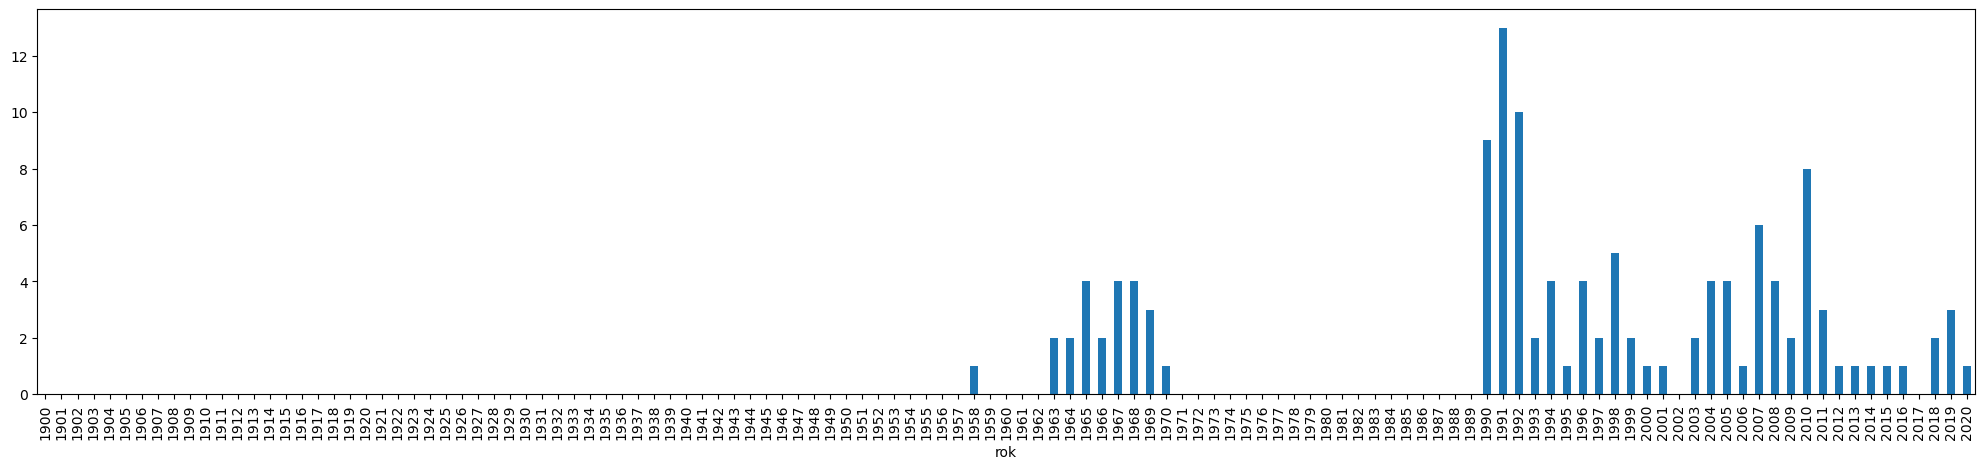

In [26]:
df[df['100_a'].str.contains('Škvorecký, Josef',na=False)].groupby("rok").size().reindex(range(1900,2021)).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

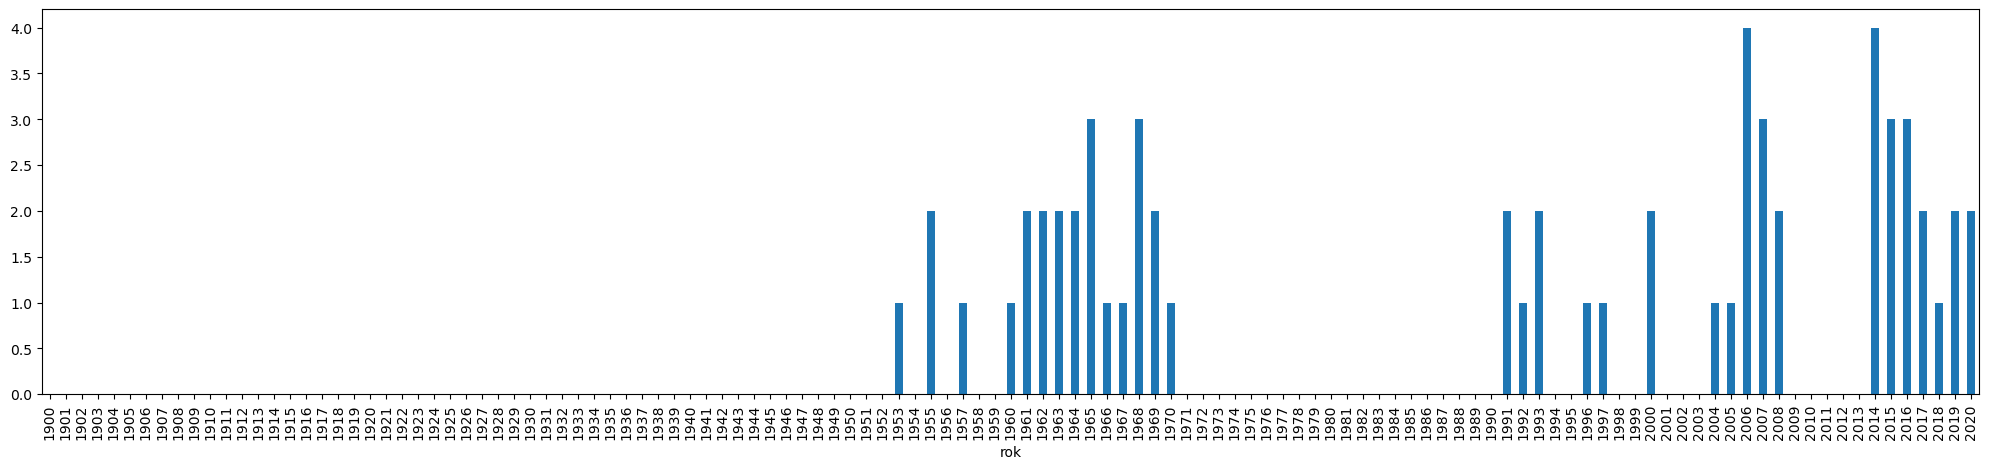

In [32]:
df[df['100_a'].str.contains('Kundera, Milan',na=False)].groupby("rok").size().reindex(range(1900,2021)).plot.bar(figsize=(25,5))